In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/multi_featk_aci.csv")

In [ ]:
X = df.drop(['Label'],axis=1)
y = df['Label']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#results storage and save function
results = {}



In [ ]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
!pip install pyswarm

Stopping search: maximum iterations reached --> 5

Best Hyperparameters:
  n_estimators: 128
  max_depth: 30
Best CV Accuracy: 0.9832


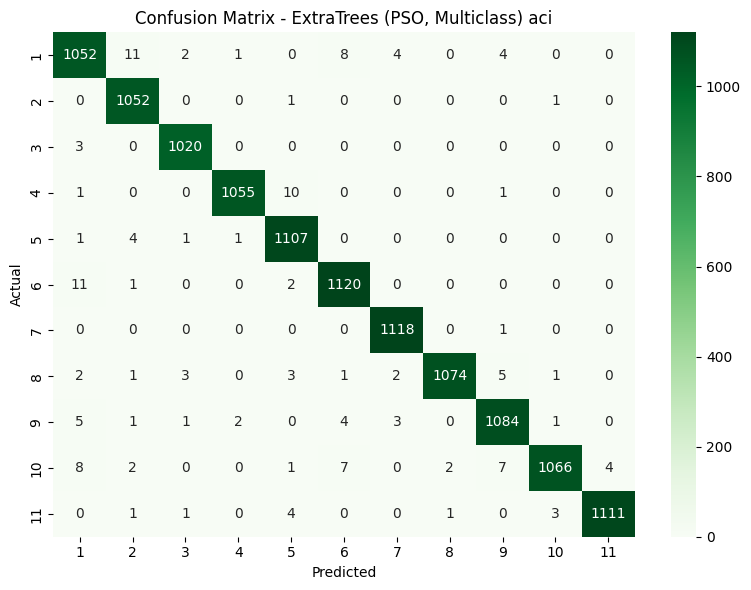

{'Best Params': {'n_estimators': 128, 'max_depth': 30}, 'Accuracy': 0.9879206931022992, 'Precision': 0.9879750134269146, 'Recall': 0.9879206931022992, 'F1 Score': 0.9879168210298307}


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from pyswarm import pso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Encode labels for multiclass
le = LabelEncoder()
y_encoded = le.fit_transform(y)
n_classes = len(le.classes_)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define objective function for PSO
def objective_function(params):
    n_estimators, max_depth = int(params[0]), int(params[1])
    model = ExtraTreesClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42,
        n_jobs=-1
    )
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    return -np.mean(scores)

# Define bounds
lb = [50, 5]   # Lower bounds
ub = [150, 30]  # Upper bounds

# Run PSO
best_params, best_score = pso(objective_function, lb, ub, swarmsize=10, maxiter=5)

# Extract best hyperparameters
n_estimators = int(best_params[0])
max_depth = int(best_params[1])

print("\nBest Hyperparameters:")
print(f"  n_estimators: {n_estimators}")
print(f"  max_depth: {max_depth}")
print("Best CV Accuracy:", -round(best_score, 4))

# Train final model
model = ExtraTreesClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Decode predictions
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred.astype(int))

# Metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

# Save results
results["ExtraTrees"] = {
    "Best Params": {
        "n_estimators": n_estimators,
        "max_depth": max_depth
    },
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - ExtraTrees (PSO, Multiclass) aci")
plt.tight_layout()
plt.savefig("confusion_matrix_extratrees_pso_multi_aci.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["ExtraTrees"])


Stopping search: maximum iterations reached --> 5

Best Hyperparameters:
  n_estimators: 65
  max_depth: 20
Best CV Accuracy: 0.9828


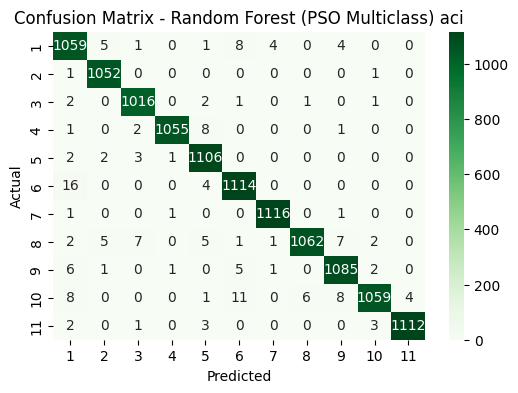

{'Best Params': {'n_estimators': 65, 'max_depth': 20}, 'Accuracy': 0.9860046651116294, 'Precision': 0.9861047877904675, 'Recall': 0.9860531098242498, 'F1 Score': 0.9860355140100195}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from pyswarm import pso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Split data (assuming X, y already loaded)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_classes = len(np.unique(y))

# Define objective function for PSO
def objective_function(params):
    n_estimators, max_depth = int(params[0]), int(params[1])
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42,
        n_jobs=-1
    )
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    return -np.mean(scores)

# Define parameter bounds
lb = [50, 5]     # Lower bounds for n_estimators, max_depth
ub = [100, 20]    # Upper bounds

# Run PSO
best_params, best_score = pso(objective_function, lb, ub, swarmsize=10, maxiter=5)

# Extract best hyperparameters
n_estimators = int(best_params[0])
max_depth = int(best_params[1])

print("\nBest Hyperparameters:")
print(f"  n_estimators: {n_estimators}")
print(f"  max_depth: {max_depth}")
print("Best CV Accuracy:", -round(best_score, 4))

# Train final model
model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')
f1 = f1_score(y_test, y_pred_rf, average='macro')

# Save results
results["RandomForest"] = {
    "Best Params": {
        "n_estimators": n_estimators,
        "max_depth": max_depth
    },
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion Matrix
class_labels = np.unique(y_test)
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_rf, labels=class_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (PSO Multiclass) aci")
plt.savefig("confusion_matrix_rf_pso_multi_aci.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["RandomForest"])


In [ ]:
!pip install catboost

Stopping search: maximum iterations reached --> 5

Best Hyperparameters:
  max_depth: 15
  min_samples_split: 4
Best CV Accuracy: 0.9348


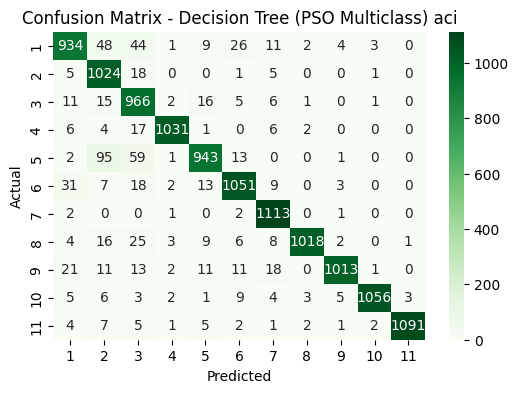

{'Best Params': {'max_depth': 15, 'min_samples_split': 4}, 'Accuracy': 0.9363545484838387, 'Precision': 0.9389413213200836, 'Recall': 0.9364918985679427, 'F1 Score': 0.9363185017780681}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from pyswarm import pso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Split data (assuming X, y already loaded)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_classes = len(np.unique(y))

# Define objective function
def objective_function(params):
    max_depth, min_samples_split = int(params[0]), int(params[1])
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    return -np.mean(scores)

# Parameter bounds
lb = [3, 2]    # min values for max_depth and min_samples_split
ub = [15, 20]  # max values

# Run PSO
best_params, best_score = pso(objective_function, lb, ub, swarmsize=10, maxiter=5)

# Extract best hyperparameters
max_depth = int(best_params[0])
min_samples_split = int(best_params[1])

print("\nBest Hyperparameters:")
print(f"  max_depth: {max_depth}")
print(f"  min_samples_split: {min_samples_split}")
print("Best CV Accuracy:", -round(best_score, 4))

# Train final model
model = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    random_state=42
)
model.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='macro')
recall = recall_score(y_test, y_pred_dt, average='macro')
f1 = f1_score(y_test, y_pred_dt, average='macro')

# Save results
results["DecisionTree"] = {
    "Best Params": {
        "max_depth": max_depth,
        "min_samples_split": min_samples_split
    },
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion matrix
class_labels = np.unique(y)
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_dt, labels=class_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree (PSO Multiclass) aci")
plt.savefig("confusion_matrix_dt_pso_multi_aci.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["DecisionTree"])


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/multi_featk_aci.csv")

In [ ]:
X = df.drop(['Label'],axis=1)
y = df['Label']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score





In [ ]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
!pip install pyswarm

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:33:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:34:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:34:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:34:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:35:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Stopping search: maximum iterations reached --> 5

Best Hyperparameters:
  n_estimators: 200
  max_depth: 8
  learning_rate: 0.2
Best CV Accuracy: 0.9877


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:32:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


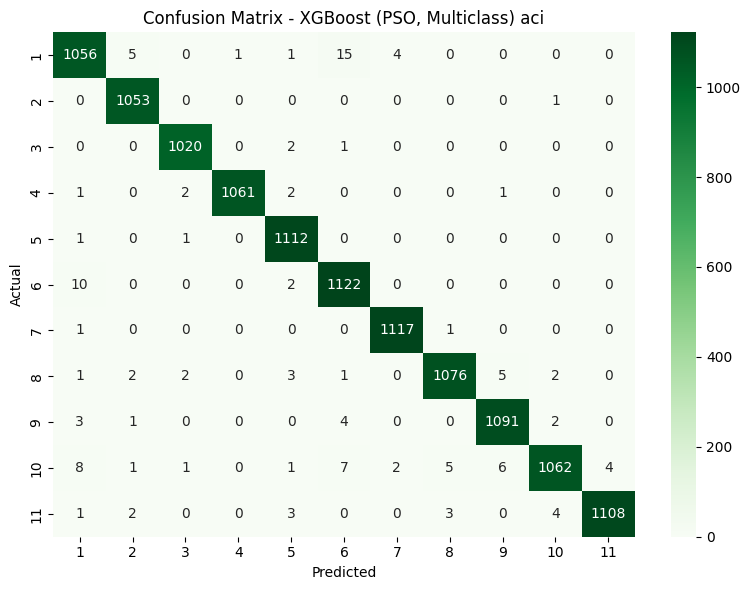

{'Best Params': {'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.2}, 'Accuracy': 0.9895034988337221, 'Precision': 0.9895359204684074, 'Recall': 0.9895034988337221, 'F1 Score': 0.9894942093068378}


In [ ]:
from xgboost import XGBClassifier
from pyswarm import pso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Encode labels for multiclass
le = LabelEncoder()
y_encoded = le.fit_transform(y)
n_classes = len(le.classes_)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define objective function for PSO
def objective_function(params):
    n_estimators, max_depth, learning_rate = params
    model = XGBClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        learning_rate=float(learning_rate),
        objective='multi:softmax',
        num_class=n_classes,
        use_label_encoder=False,
        eval_metric='merror',
        random_state=42,
        n_jobs=-1
    )
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    return -np.mean(scores)

# Define bounds
lb = [100, 5, 0.01]   # Lower bounds
ub = [200, 15, 0.2]   # Upper bounds

# Run PSO
best_params, best_score = pso(objective_function, lb, ub, swarmsize=10, maxiter=5)

# Extract best hyperparameters
n_estimators = int(best_params[0])
max_depth = int(best_params[1])
learning_rate = float(best_params[2])

print("\nBest Hyperparameters:")
print(f"  n_estimators: {n_estimators}")
print(f"  max_depth: {max_depth}")
print(f"  learning_rate: {learning_rate}")
print("Best CV Accuracy:", -round(best_score, 4))

# Train final model
model = XGBClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    learning_rate=learning_rate,
    objective='multi:softmax',
    num_class=n_classes,
    use_label_encoder=False,
    eval_metric='merror',
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Decode predictions
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred.astype(int))

# Metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

# Save results
results["XGBoost"] = {
    "Best Params": {
        "n_estimators": n_estimators,
        "max_depth": max_depth,
        "learning_rate": learning_rate
    },
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost (PSO, Multiclass) aci")
plt.tight_layout()
plt.savefig("confusion_matrix_xgboost_pso_multi_aci.png", dpi=800)
plt.show()
plt.close()
print(results["XGBoost"])

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

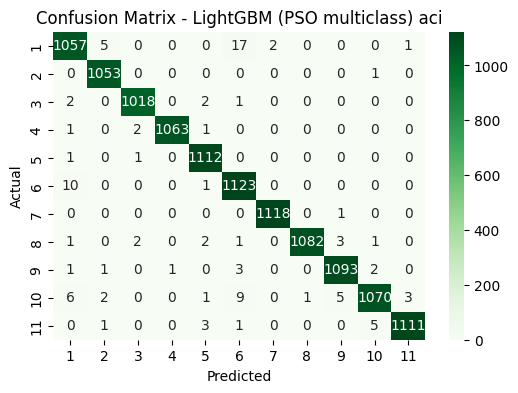

{'Best Params': {'n_estimators': 135, 'num_leaves': 44, 'learning_rate': 0.1710044099507452}, 'Accuracy': 0.9913362212595801, 'Precision': 0.9914441736948262, 'Recall': 0.9913603161952175, 'F1 Score': 0.9913835804156683}


In [ ]:
from lightgbm import LGBMClassifier
from pyswarm import pso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Split data (assuming X, y already loaded)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_classes = len(np.unique(y))

# Define objective function for PSO
def objective_function(params):
    n_estimators, num_leaves, learning_rate = params
    model = LGBMClassifier(
        n_estimators=int(n_estimators),
        num_leaves=int(num_leaves),
        learning_rate=float(learning_rate),
        objective='multiclass',
        num_class=num_classes,
        random_state=42,
        n_jobs=-1
    )
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    return -np.mean(scores)

# Define parameter bounds
lb = [100, 20, 0.01]
ub = [200, 60, 0.2]

# Run PSO
best_params, best_score = pso(objective_function, lb, ub, swarmsize=10, maxiter=5)

# Extract best hyperparameters
n_estimators = int(best_params[0])
num_leaves = int(best_params[1])
learning_rate = float(best_params[2])

print("\nBest Hyperparameters:")
print(f"  n_estimators: {n_estimators}")
print(f"  num_leaves: {num_leaves}")
print(f"  learning_rate: {learning_rate}")
print("Best CV Accuracy:", -round(best_score, 4))

# Train final model
model = LGBMClassifier(
    n_estimators=n_estimators,
    num_leaves=num_leaves,
    learning_rate=learning_rate,
    objective='multiclass',
    num_class=num_classes,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
y_pred_lgbm = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_lgbm)
precision = precision_score(y_test, y_pred_lgbm, average='macro')
recall = recall_score(y_test, y_pred_lgbm, average='macro')
f1 = f1_score(y_test, y_pred_lgbm, average='macro')

# Save results
results["LightGBM"] = {
    "Best Params": {
        "n_estimators": n_estimators,
        "num_leaves": num_leaves,
        "learning_rate": learning_rate
    },
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion Matrix
class_labels = np.unique(y_test)
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_lgbm, labels=class_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM (PSO multiclass) aci")
plt.savefig("confusion_matrix_lightgbm_pso_multi_aci.png", dpi=800)
plt.show()
plt.close()
print(results["LightGBM"])

In [ ]:
!pip install catboost

Stopping search: maximum iterations reached --> 5

Best Hyperparameters:
  iterations: 200
  depth: 6
  learning_rate: 0.19895637348729467
Best CV Accuracy: 0.973


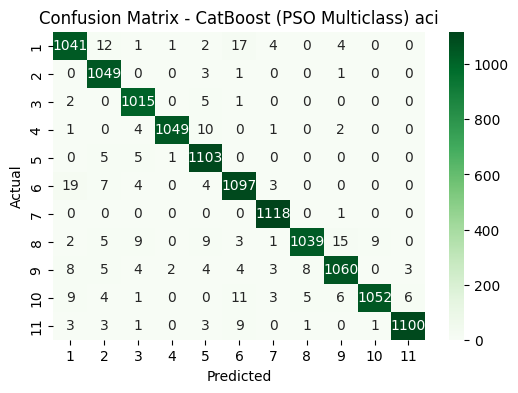

{'Best Params': {'iterations': 200, 'depth': 6, 'learning_rate': 0.19895637348729467}, 'Accuracy': 0.9765911362879041, 'Precision': 0.9767562906400847, 'Recall': 0.9767045227829132, 'F1 Score': 0.9766148306638701}


In [ ]:
from catboost import CatBoostClassifier
from pyswarm import pso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Split data (assuming X, y already loaded)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_classes = len(np.unique(y))

# Define objective function
def objective_function(params):
    iterations, depth, learning_rate = params
    model = CatBoostClassifier(
        iterations=int(iterations),
        depth=int(depth),
        learning_rate=float(learning_rate),
        loss_function='MultiClass',
        verbose=0,
        random_state=42
    )
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    return -np.mean(scores)

# Parameter bounds
lb = [100, 6, 0.01]
ub = [200, 8, 0.2]

# Run PSO
best_params, best_score = pso(objective_function, lb, ub, swarmsize=10, maxiter=5)

# Extract best hyperparameters
iterations = int(best_params[0])
depth = int(best_params[1])
learning_rate = float(best_params[2])

print("\nBest Hyperparameters:")
print(f"  iterations: {iterations}")
print(f"  depth: {depth}")
print(f"  learning_rate: {learning_rate}")
print("Best CV Accuracy:", -round(best_score, 4))

# Train final model
model = CatBoostClassifier(
    iterations=iterations,
    depth=depth,
    learning_rate=learning_rate,
    loss_function='MultiClass',
    verbose=0,
    random_state=42
)
model.fit(X_train, y_train)
y_pred_cat = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_cat)
precision = precision_score(y_test, y_pred_cat, average='macro')
recall = recall_score(y_test, y_pred_cat, average='macro')
f1 = f1_score(y_test, y_pred_cat, average='macro')

# Save results
results["CatBoost"] = {
    "Best Params": {
        "iterations": iterations,
        "depth": depth,
        "learning_rate": learning_rate
    },
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion matrix
class_labels = np.unique(y)
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_cat, labels=class_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost (PSO Multiclass) aci")
plt.savefig("confusion_matrix_catboost_pso_multi_aci.png", dpi=800)
plt.show()
plt.close()
print(results["CatBoost"])

# **Comparison**

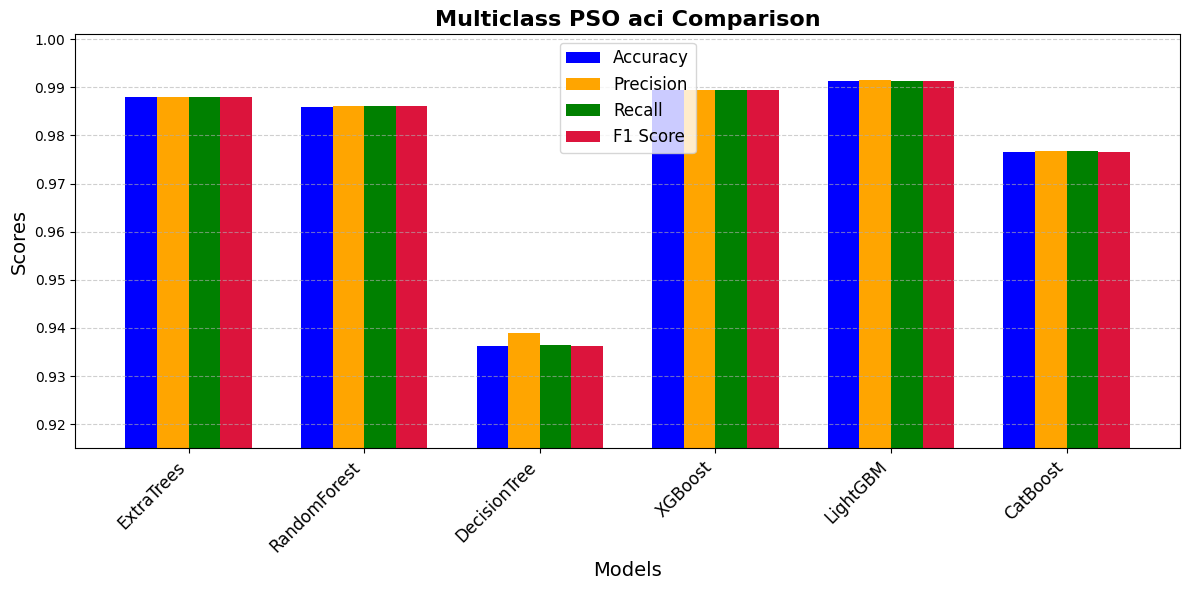

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example results dictionary
# Assume you already have it filled with 6 models
# results = {
#     "XGBoost": {...},
#     "LightGBM": {...},
#     "CatBoost": {...},
#     "Model4": {...},
#     "Model5": {...},
#     "Model6": {...},
# }

# Extract models and their metrics
models = list(results.keys())
accuracy = [results[model]["Accuracy"] for model in models]
precision = [results[model]["Precision"] for model in models]
recall = [results[model]["Recall"] for model in models]
f1 = [results[model]["F1 Score"] for model in models]

# Set up bar width and positions
x = np.arange(len(models))
width = 0.18  # a bit wider spacing

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - 1.5*width, accuracy, width=width, label='Accuracy', color='blue')  # nicer blue
ax.bar(x - 0.5*width, precision, width=width, label='Precision', color='orange')  # bright orange
ax.bar(x + 0.5*width, recall, width=width, label='Recall', color='green')  # mediumseagreen
ax.bar(x + 1.5*width, f1, width=width, label='F1 Score', color='crimson')  # crimson

# Customize labels and title
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Multiclass PSO aci Comparison', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=12)
ax.set_ylim(0.915, 1.001)  # focus on high values
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Save and show
plt.tight_layout()
plt.savefig("multiclass_pso_aci_comparison.png", dpi=1000, bbox_inches='tight')
plt.show()
